# Deep Q-learning

In [1]:
import gym
import tensorflow
from matplotlib import pyplot
import dqn

/home/podondra/gym-rl/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Atari 2600 Breakout

In [2]:
env = gym.make('Breakout-v0')
env.action_space, env.observation_space
# env.observation_space.low, env.observation_space.high

(Discrete(4), Box(210, 160, 3))

In [3]:
env.env.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [4]:
S = env.reset()
for t in range(250):
    env.render()
    # take a random action
    A = env.action_space.sample()
    S_next, R, done, info = env.step(A)
    if R:
        print(R)
    if done:
        break
env.render(close=True)
info, S.shape

1.0


({'ale.lives': 0}, (210, 160, 3))

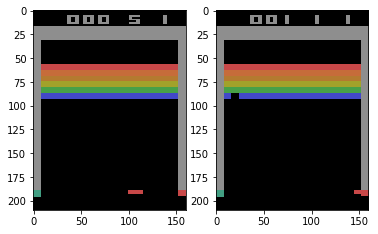

In [5]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2)
ax1.imshow(S)
ax2.imshow(S_next)

## Preprocessing

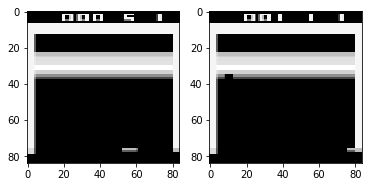

In [6]:
preprocess = dqn.Preprocessor()
sess = tensorflow.InteractiveSession()
theta = preprocess(S, sess)
theta_next = preprocess(S_next, sess)
fig, (ax1, ax2) = pyplot.subplots(ncols=2)
ax1.imshow(theta, cmap='gray')
ax2.imshow(theta_next, cmap='gray')

## Experience Replay

In [7]:
D = dqn.ReplayMemory(env, preprocess, sess)
len(D)

50000

In [8]:
D.store(theta, A, R)
D[-1] == (theta, A, R), len(D)

(True, 50001)

In [9]:
S = D.get_recent_state()
S.shape

(84, 84, 4)

In [10]:
ys = D.sample_minibatch()
S, A, R, S_next = ys[0]
len(ys)

32

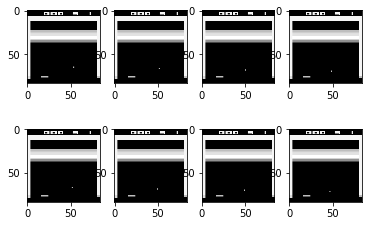

In [11]:
f, axes = pyplot.subplots(nrows=2, ncols=4)
for i, ax in enumerate(axes.T):
    ax[0].imshow(S[..., i], cmap='gray')
    ax[1].imshow(S_next[..., i], cmap='gray')

## Deep Q-network

In [ ]:
deep_q_network = dqn.DQN(env)

## Algorithm

In [ ]:
def deep_q_learning(env, time_steps):
    C = 10000  # target network update frequency
    time_steps_counter = range(1, time_steps + 1)
    preprocess = dqn.Preprocessor()

    # initialize replay memory
    D = dqn.ReplayMemory()
    # initialize action-value function with random weights
    Q = dqn.DQN(env)
    # intialize taget action-value function
    target_Q = dqn.DQN(env, Q.clone_weights())
    for episode in itertools.count():
        # intialize sequence
        X = env.reset()
        theta = preprocess(X)
        for t in time_step_counter:
            # choose epsilon greedy action
            A = Q.epsilon_greedy_action(D.get_recent_state())
            # execute action in emulator and observe reward and image
            X_next, R, done, _ = env.step(A)
            theta_next = preprocess(X_next)
            # store transition in replay memory
            D.store(theta, A, R)
            # sample minibatch from replay memory
            transitions = D.sample_minibatch()
            # set y
            ys = target_Q.get_q_value(transitions)
            # perform gradient descent step
            Q.gradient_descent_step(ys, Ss, As, sess)
            # every C steps reset target_Q = Q
            if time_step_counter % C == 0:
                target_Q.weights = Q.clone_weights()
            if done:
                D.store(theta_next, -1, 0)
                break
            X, theta = X_next, theta_next

deep_q_learning(env, 100)